In [22]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [23]:
df = pd.read_csv('Data/cleaned_data.csv')
df.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.09,Clothing,Nike,Shorts,Excellent,Same-Day,Debit_Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.71,Electronics,Samsung,Tablet,Excellent,Standard,Credit_Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.43,Books,Penguin_Books,Children's,Average,Same-Day,Credit_Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.85,Home_Decor,Home_Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.55,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298141 entries, 0 to 298140
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    298141 non-null  float64
 1   Customer_ID       298141 non-null  float64
 2   Name              298141 non-null  object 
 3   Email             298141 non-null  object 
 4   Phone             298141 non-null  float64
 5   Address           298141 non-null  object 
 6   City              298141 non-null  object 
 7   State             298141 non-null  object 
 8   Zipcode           298141 non-null  float64
 9   Country           298141 non-null  object 
 10  Age               298141 non-null  float64
 11  Gender            298141 non-null  object 
 12  Income            298141 non-null  object 
 13  Customer_Segment  298141 non-null  object 
 14  Date              298141 non-null  object 
 15  Year              298141 non-null  float64
 16  Month             29

In [25]:
numerical_col = [col for col in df.columns if df[col].dtype == 'float64' or df[col].dtype == 'int64']
corr = df[numerical_col].corr()

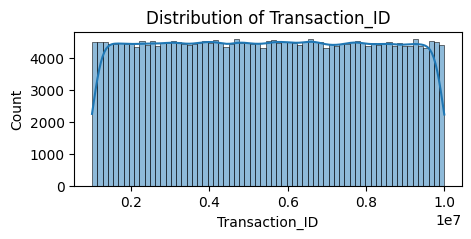

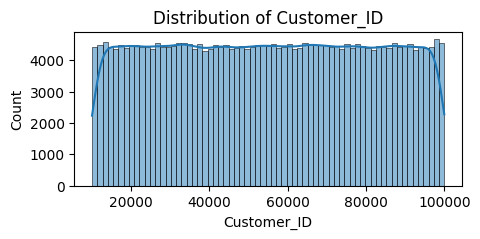

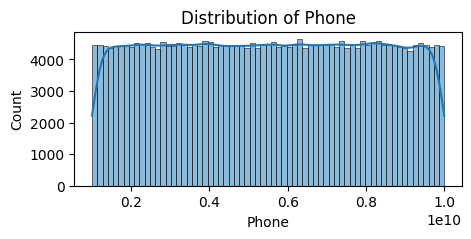

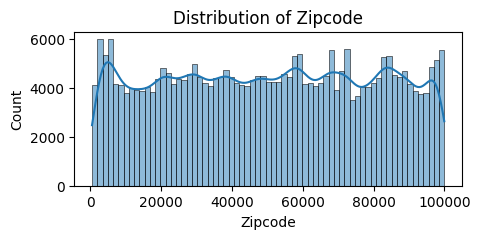

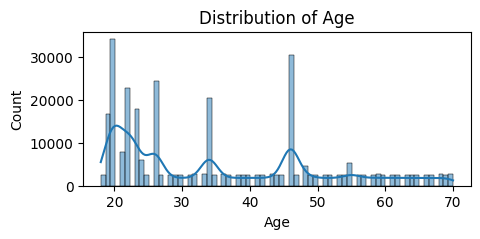

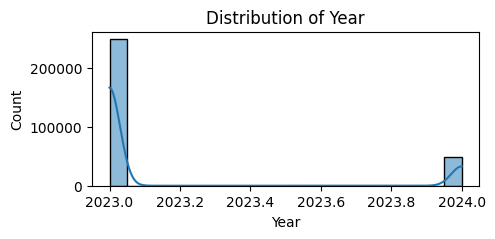

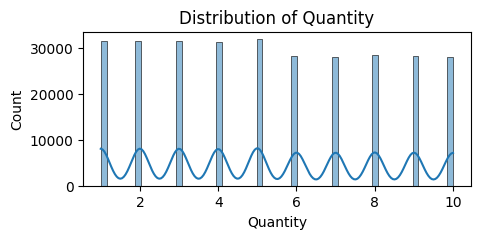

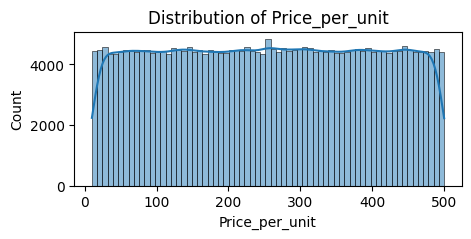

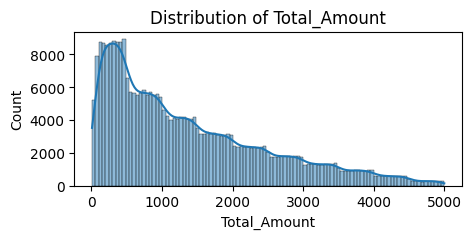

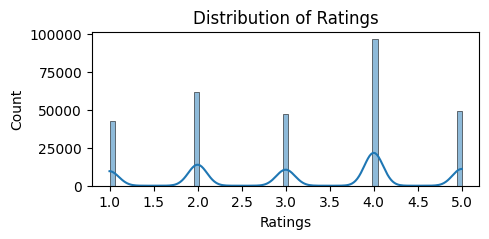

In [26]:
numerical_cols = df.select_dtypes(include=['float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(5, 2))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

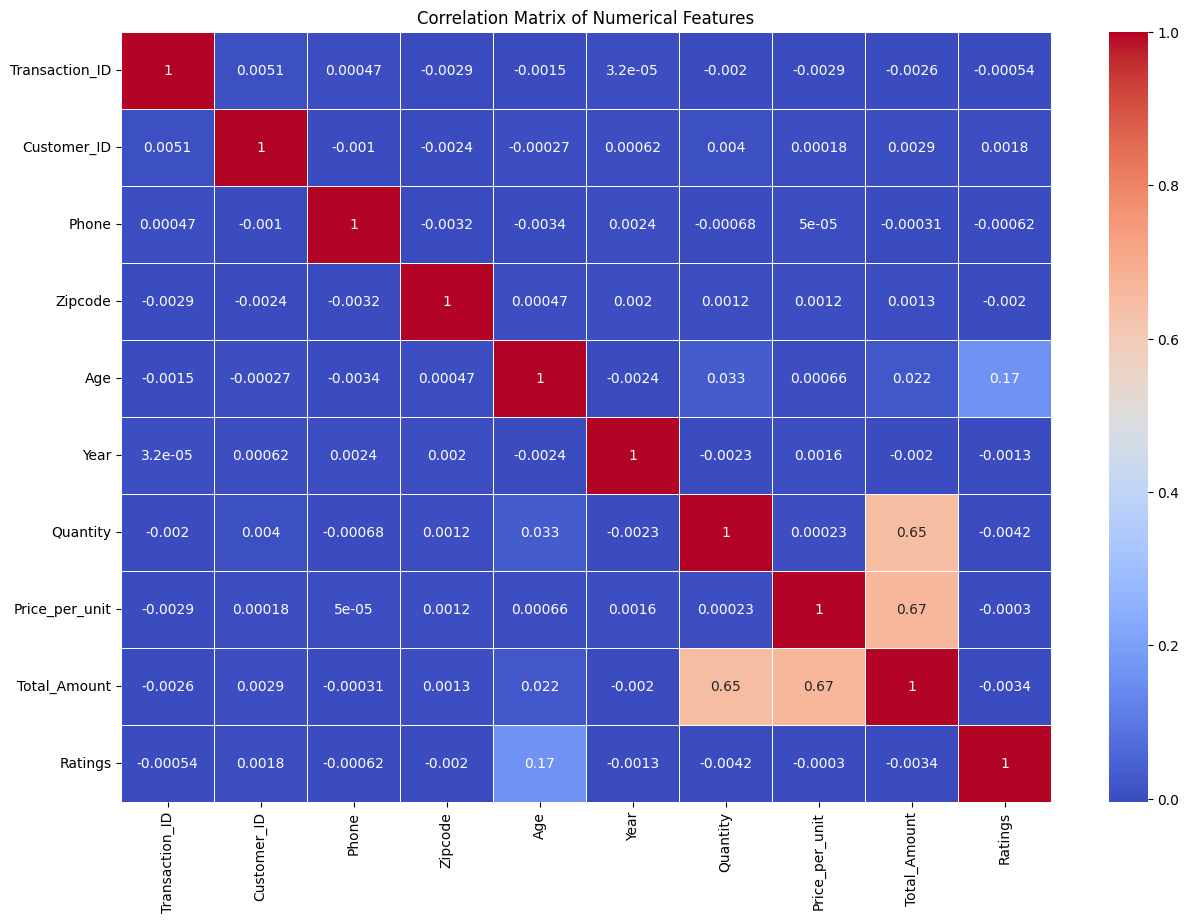

In [27]:
numerical_col = [col for col in df.columns if df[col].dtype == 'float64' or df[col].dtype == 'int64']
corr_matrix = df[numerical_col].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

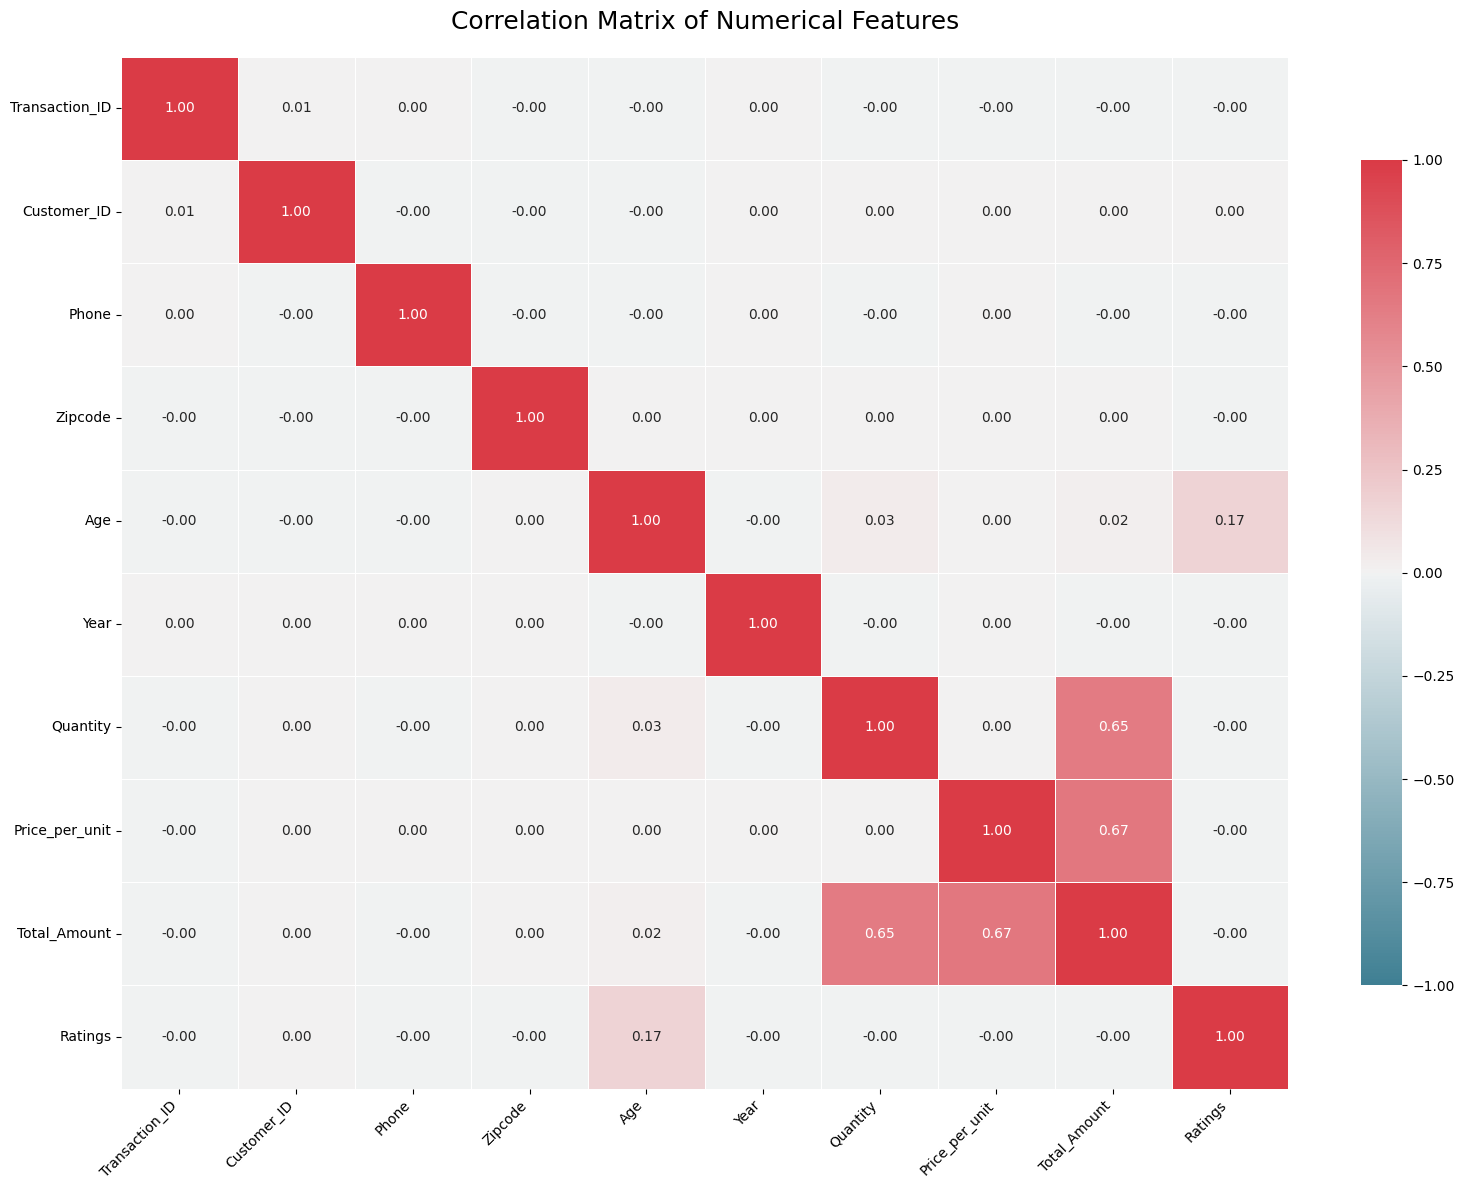

In [28]:
numerical_col = [col for col in df.columns if df[col].dtype == 'float64' or df[col].dtype == 'int64']
corr_matrix = df[numerical_col].corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Plot the correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    vmin=-1,
    vmax=1,
    center=0,
    linewidths=.5,
    cbar_kws={"shrink": .8}
)

# Add titles and labels
plt.title('Correlation Matrix of Numerical Features', fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


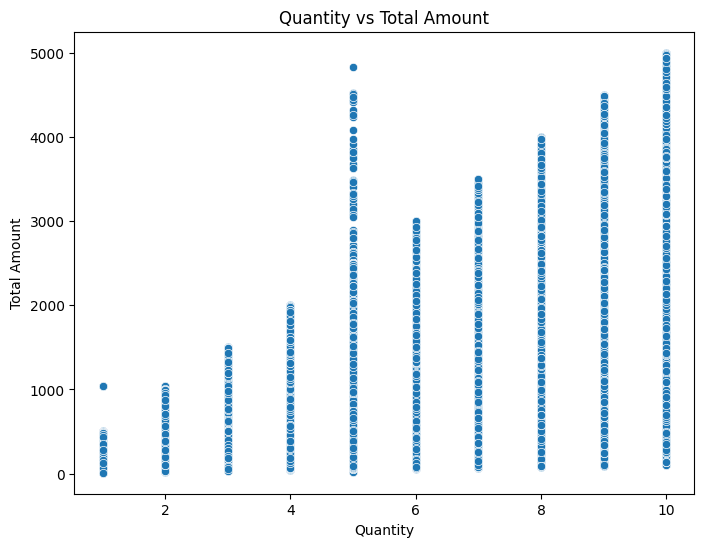

In [29]:
# Scatter plot between Quantity and Total_Amount
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Quantity', y='Total_Amount', data=df)
plt.title('Quantity vs Total Amount')
plt.xlabel('Quantity')
plt.ylabel('Total Amount')
plt.show()


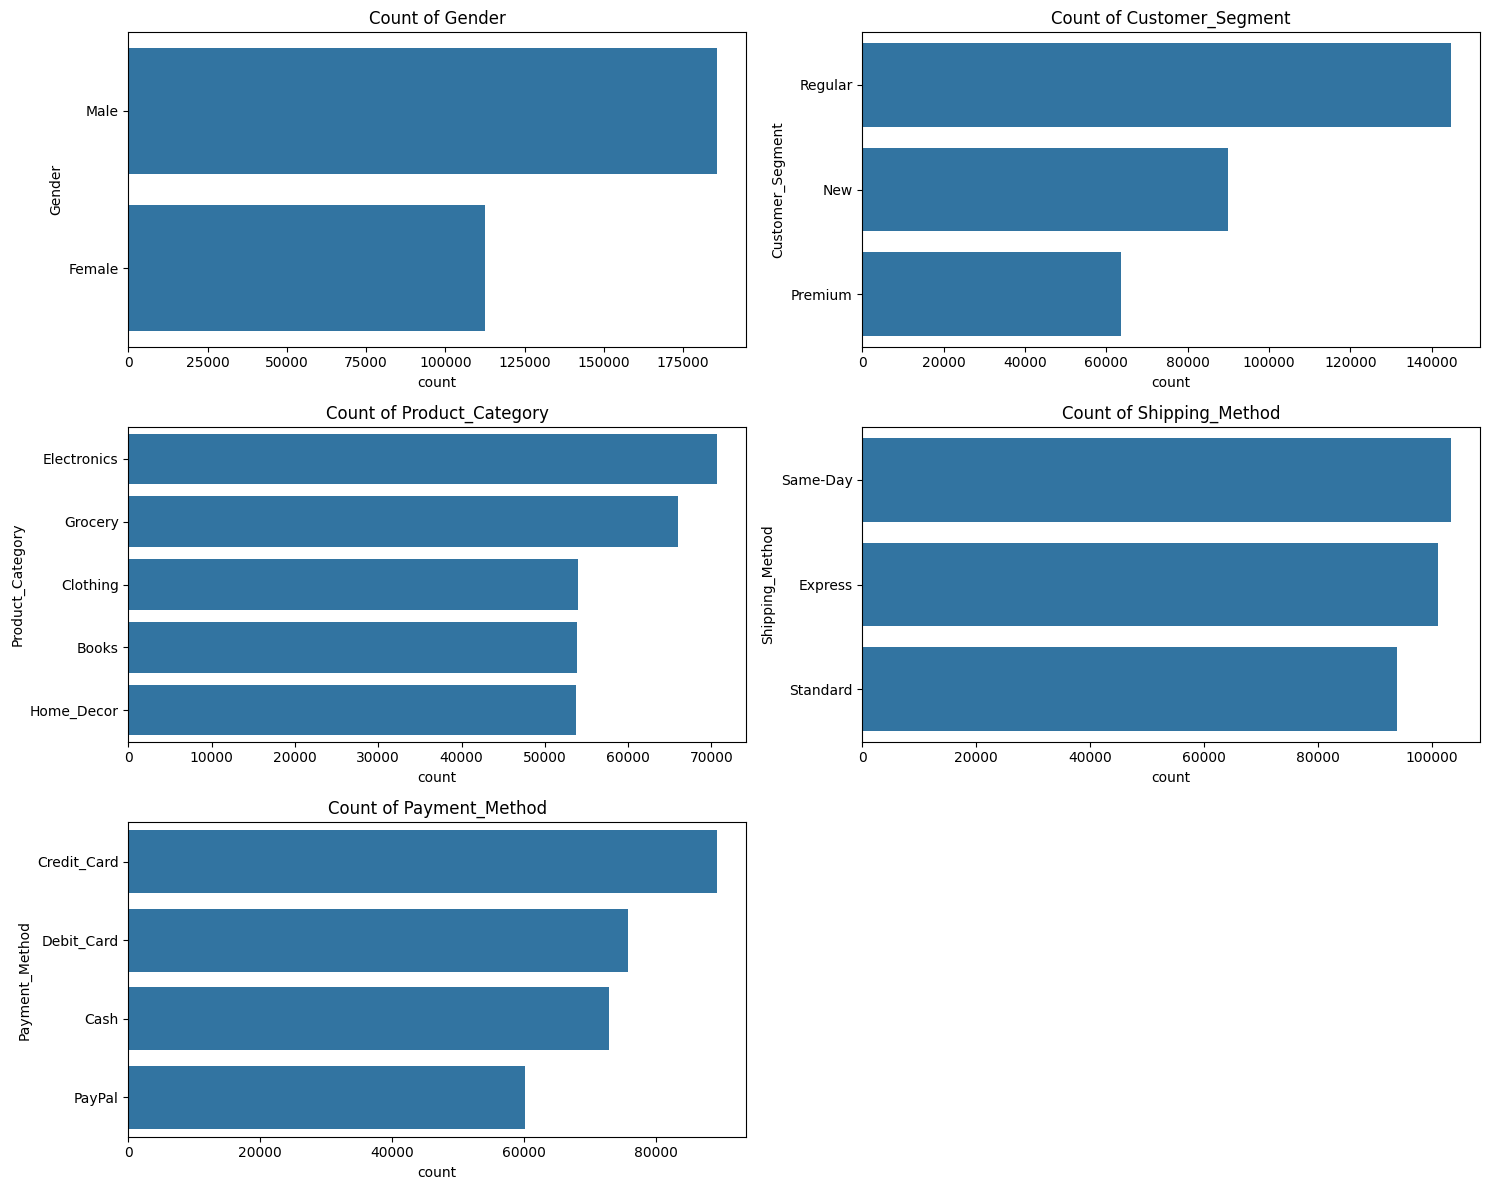

In [30]:
# List of categorical columns to plot
categorical_cols = ['Gender', 'Customer_Segment', 'Product_Category', 'Shipping_Method', 'Payment_Method']

# Plot bar plots for categorical columns
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

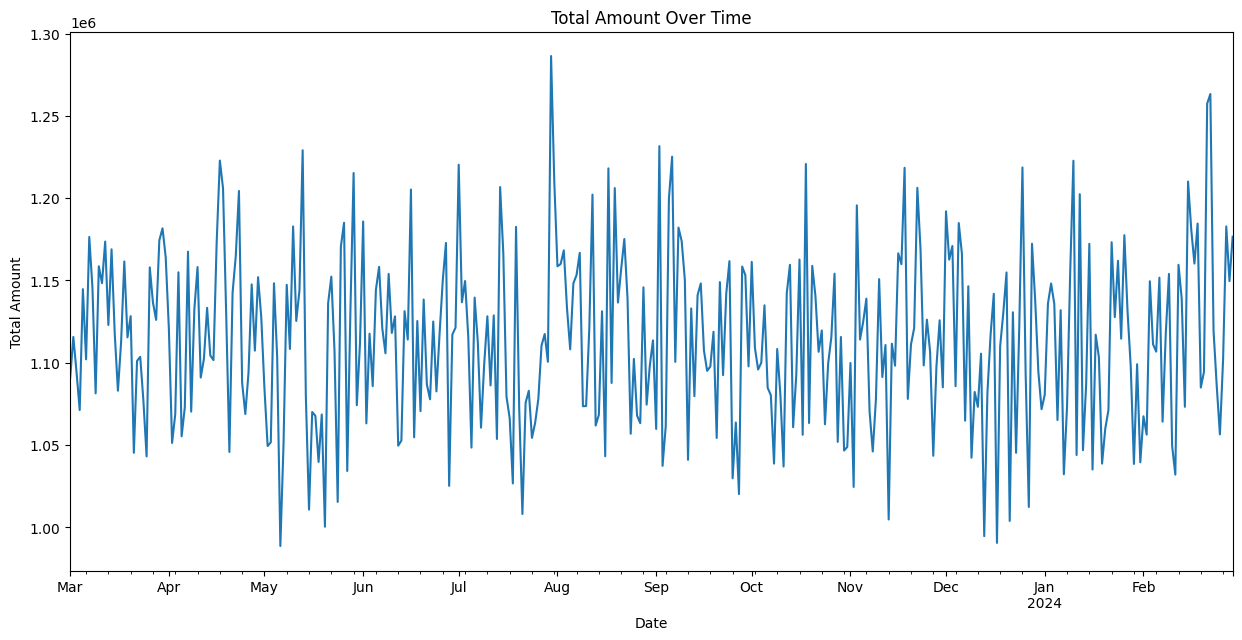

In [31]:
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(15, 7))
df.groupby('Date')['Total_Amount'].sum().plot()
plt.title('Total Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.show()


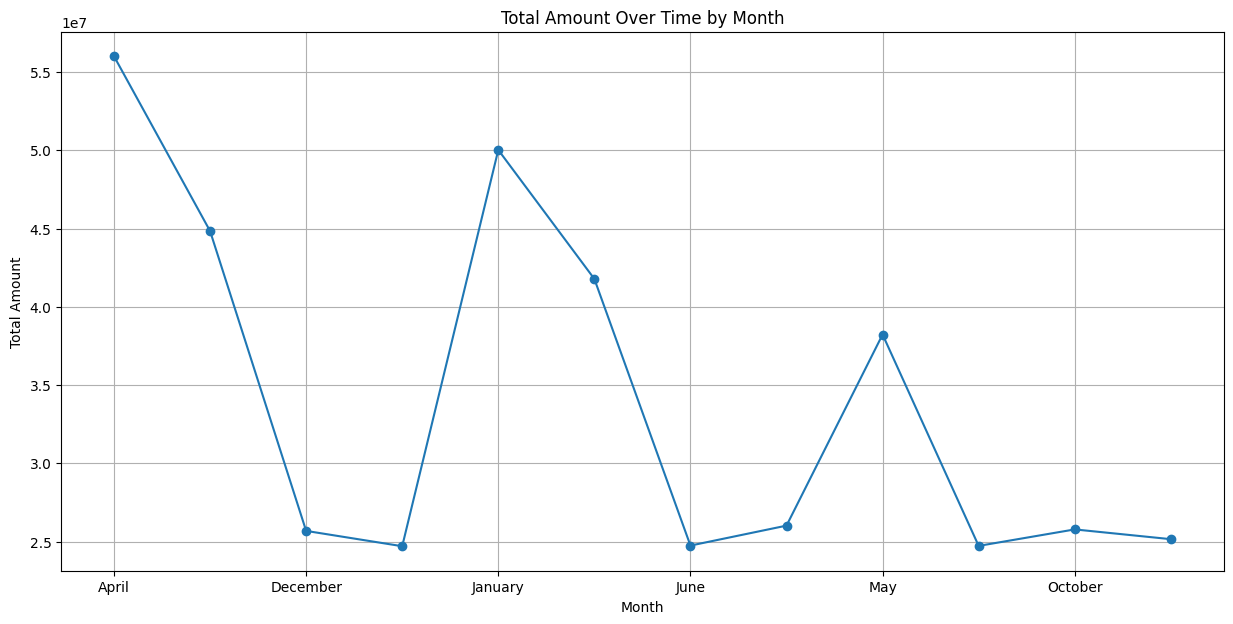

In [32]:
monthly_sales = df.groupby('Month')['Total_Amount'].sum()

# Plot Total Amount over time by month
plt.figure(figsize=(15, 7))
monthly_sales.plot(marker='o')  # Add marker for each month data point
plt.title('Total Amount Over Time by Month')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

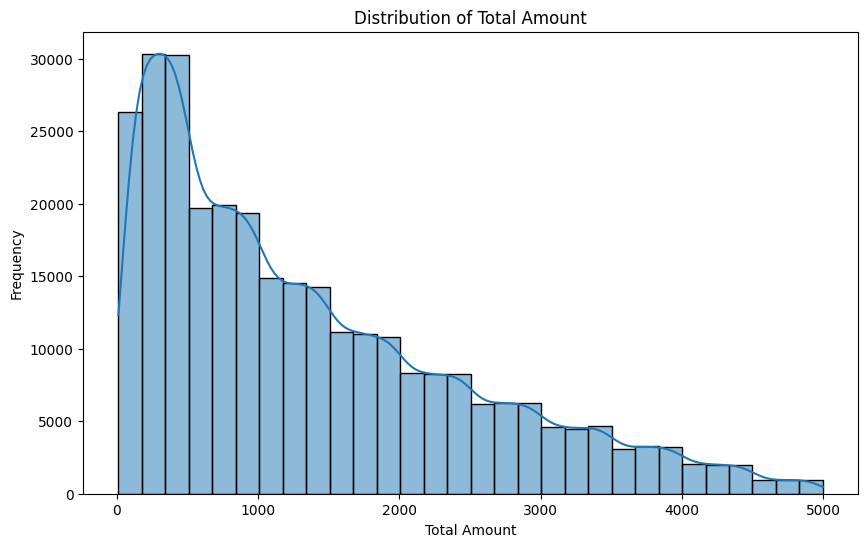

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Amount'], bins=30, kde=True)
plt.title('Distribution of Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()


C:\Users\RC543\AppData\Local\Temp\ipykernel_19364\3843357818.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product_Category', y='Total_Amount', data=df, ci=None)


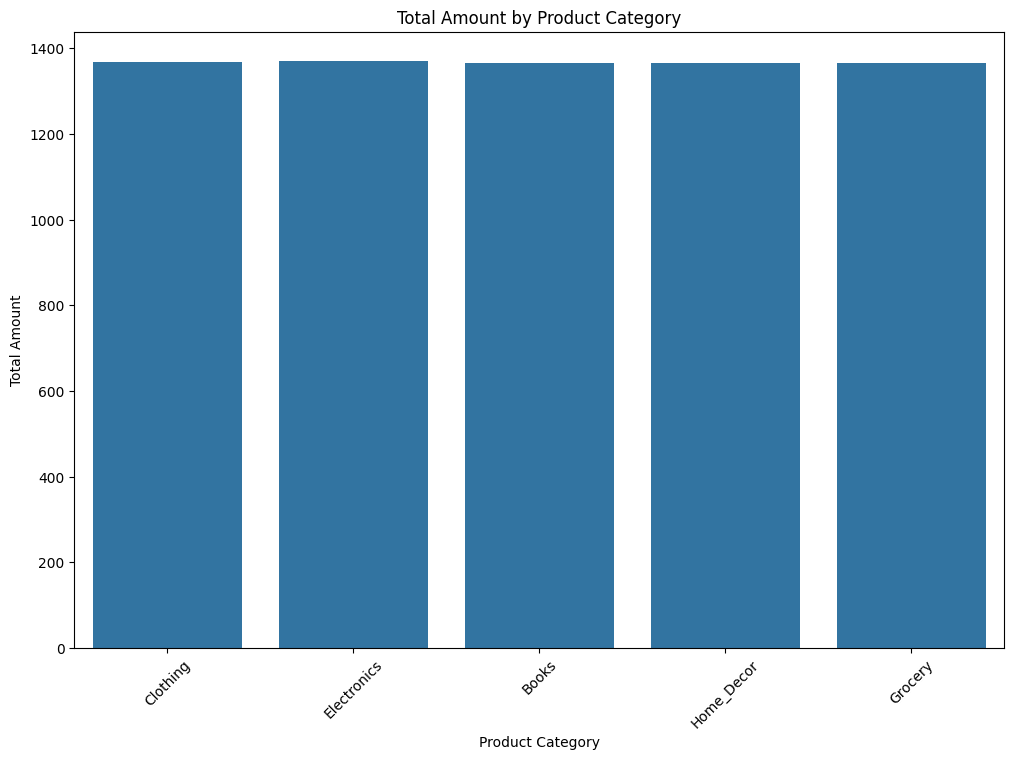

In [41]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Product_Category', y='Total_Amount', data=df, ci=None)
plt.title('Total Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()


C:\Users\RC543\AppData\Local\Temp\ipykernel_19364\1536984659.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Country', y='Total_Amount', data=df, ci=None)


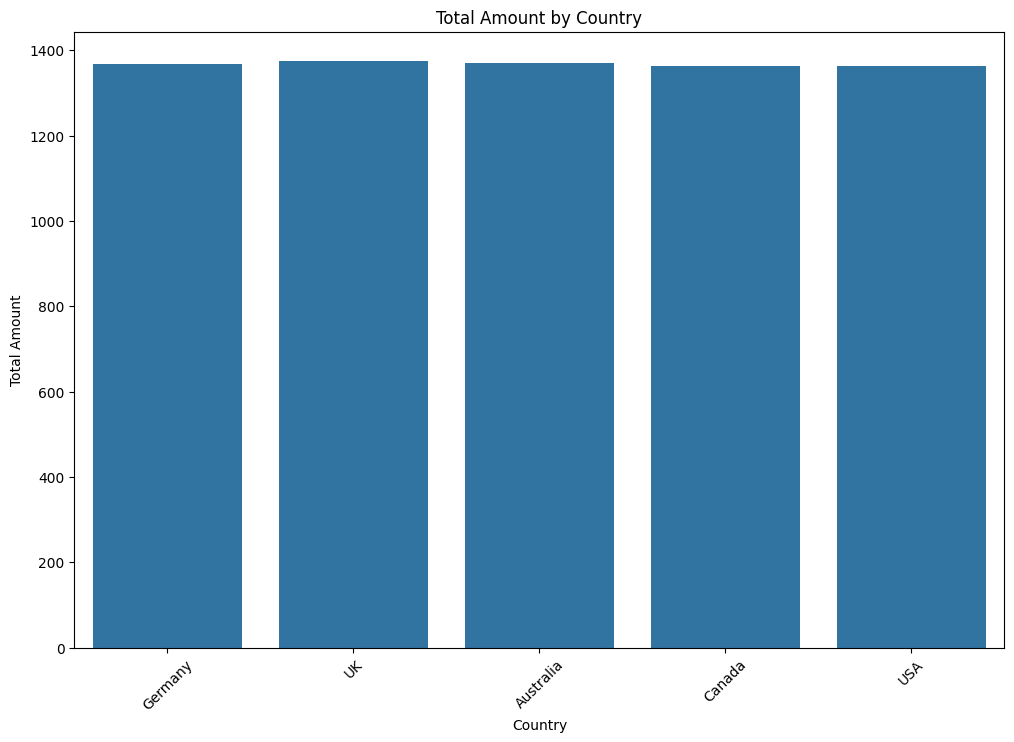

In [42]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Country', y='Total_Amount', data=df, ci=None)
plt.title('Total Amount by Country')
plt.xlabel('Country')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()


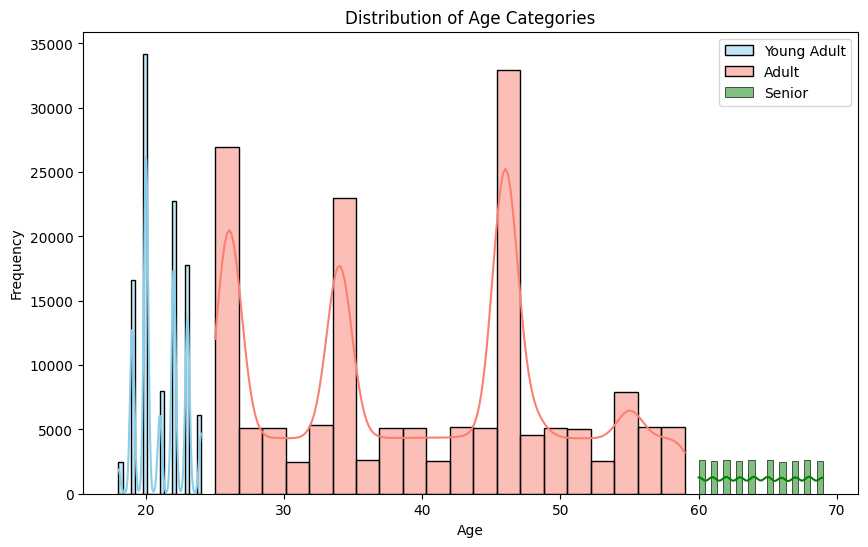

In [47]:
# Define age categories
bins = [0, 25, 60, df['Age'].max()]
labels = ['Young Adult', 'Adult', 'Senior']

# Create a new column for age categories
df['Age_Category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Plot histogram for each age category
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Age_Category'] == 'Young Adult']['Age'], bins=20, kde=True, color='skyblue', label='Young Adult')
sns.histplot(df[df['Age_Category'] == 'Adult']['Age'], bins=20, kde=True, color='salmon', label='Adult')
sns.histplot(df[df['Age_Category'] == 'Senior']['Age'], bins=20, kde=True, color='green', label='Senior')
plt.title('Distribution of Age Categories')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()
